<a href="https://colab.research.google.com/github/maysalimi/heart-disease-prediction-xgboost-SHAP/blob/main/Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset downloaded from: https://www.kaggle.com/datasets/dartweichen/student-life

In [ ]:
# Install required libraries
!pip install xgboost shap scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd              # For loading and handling data
import numpy as np               # For numeric operations
import matplotlib.pyplot as plt  # For visualizations
import seaborn as sns            # For prettier plots

# Sklearn for ML tasks
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# XGBoost and SHAP
import xgboost as xgb
import shap
shap.initjs()  # Enables JS-based SHAP plots in Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/CIBB/ED/'

 dataset   project.ipynb   Proj.ipynb  'Untitled document.gdoc'


In [ ]:
!ls '/content/drive/My Drive/CIBB/ED/dataset'

app_usage  calendar  call_log  dinning	education  EMA	sensing  sms  survey


In [ ]:
# Import necessary libraries
import os
import pandas as pd

# Define the root directory of your dataset
root_dir = '/content/drive/My Drive/CIBB/ED/dataset/'

# Subfolders containing data (replaced dining with dinning)
subdirectories = ['app_usage', 'calendar', 'call_log', 'dinning', 'education', 'EMA', 'sensing', 'sms', 'survey']

# Initialize a dictionary to store dataframes for each file
dataframes = {}

# Load the data from all the folders
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    files = os.listdir(folder_path)

    # Load CSV files into dataframes, handling errors in parsing
    for csv_file in files:
        if csv_file.endswith('.csv'):
            file_path = os.path.join(folder_path, csv_file)
            print(f"Loading file: {file_path}")
            try:
                # Try to load the CSV, skipping problematic lines
                dataframes[csv_file] = pd.read_csv(file_path, on_bad_lines='skip')  # Skip bad lines
            except pd.errors.ParserError as e:
                print(f"Error loading {csv_file}: {e}")

# Check the files that have been loaded
print("\nLoaded files:")
for filename in dataframes.keys():
    print(filename)

# Preview data from one of the files (you can change the file name)
example_file = list(dataframes.keys())[0]  # Pick the first file loaded
print(f"\nPreview of {example_file}:")
print(dataframes[example_file].head())

Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u00.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u04.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u03.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u02.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u01.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u10.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u08.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u12.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u09.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u05.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u07.csv
Loading file: /content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_

In [ ]:
import pandas as pd

# Check the first few rows of one of the files
app_usage_df = pd.read_csv('/content/drive/My Drive/CIBB/ED/dataset/app_usage/running_app_u00.csv')
print(app_usage_df.head())

                                        id  \
0  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
1  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
2  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
3  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
4  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   

                                 device   timestamp  \
0  1977b545-a88f-4903-a7ae-2c434de4be49  1364100683   
1  1977b545-a88f-4903-a7ae-2c434de4be49  1364100683   
2  1977b545-a88f-4903-a7ae-2c434de4be49  1364100683   
3  1977b545-a88f-4903-a7ae-2c434de4be49  1364100683   
4  1977b545-a88f-4903-a7ae-2c434de4be49  1364100683   

                   RUNNING_TASKS_baseActivity_mClass  \
0  com.google.android.gm.ConversationListActivity...   
1                     com.android.launcher2.Launcher   
2                         com.rhmsoft.fm.FileManager   
3        com.android.systemui.recent.RecentsActivity   
4  com.google.android.apps.paco.ExperimentManager...   

  RUNNING_TASKS_baseActivity_mPackage  RUNNING_TASKS_id

In [ ]:
# Convert any timestamp columns to datetime and extract useful features
app_usage_df['timestamp'] = pd.to_datetime(app_usage_df['timestamp'])
app_usage_df['hour'] = app_usage_df['timestamp'].dt.hour
app_usage_df['weekday'] = app_usage_df['timestamp'].dt.weekday

In [ ]:
print(app_usage_df.columns)


from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select the columns to scale (e.g., numeric columns like usage time, accelerometer readings, etc.)
columns_to_scale = ['RUNNING_TASKS_numActivities', 'RUNNING_TASKS_numRunning', 'hour']  # Example columns to scale, adjust as needed

# Apply scaling
app_usage_df[columns_to_scale] = scaler.fit_transform(app_usage_df[columns_to_scale])

# Check the result (you can print a sample to verify scaling)
print(app_usage_df.head())

#scaler = StandardScaler()
#app_usage_df[['usage_time']] = scaler.fit_transform(app_usage_df[['usage_time']])

Index(['id', 'device', 'timestamp', 'RUNNING_TASKS_baseActivity_mClass',
       'RUNNING_TASKS_baseActivity_mPackage', 'RUNNING_TASKS_id',
       'RUNNING_TASKS_numActivities', 'RUNNING_TASKS_numRunning',
       'RUNNING_TASKS_topActivity_mClass',
       'RUNNING_TASKS_topActivity_mPackage', 'hour', 'weekday'],
      dtype='object')
                                        id  \
0  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
1  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
2  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
3  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   
4  a7d09e48-5bbd-4672-9f55-ea34bf4862ee-38   

                                 device                     timestamp  \
0  1977b545-a88f-4903-a7ae-2c434de4be49 1970-01-01 00:00:01.364100683   
1  1977b545-a88f-4903-a7ae-2c434de4be49 1970-01-01 00:00:01.364100683   
2  1977b545-a88f-4903-a7ae-2c434de4be49 1970-01-01 00:00:01.364100683   
3  1977b545-a88f-4903-a7ae-2c434de4be49 1970-01-01 00:00:01.364100683   
4  1977b545-a88f-4903-a

In [ ]:
# Check for missing values
print(app_usage_df.isnull().sum())


# Fill missing values for numeric columns with the median
numeric_columns = app_usage_df.select_dtypes(include=['float64', 'int64']).columns
app_usage_df[numeric_columns] = app_usage_df[numeric_columns].fillna(app_usage_df[numeric_columns].median())

# Fill missing values for categorical columns with the mode
categorical_columns = app_usage_df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    app_usage_df[col].fillna(app_usage_df[col].mode()[0], inplace=True)


id                                                                                      0
device                                                                                  0
timestamp                                                                               0
RUNNING_TASKS_baseActivity_mPackage                                                     0
RUNNING_TASKS_id                                                                        0
                                                                                       ..
RUNNING_TASKS_baseActivity_mClass_imoblife.androidsensorbox.AndroidSensorBoxActivity    0
RUNNING_TASKS_baseActivity_mClass_net.learn2develop.Databases.DatabasesActivity         0
RUNNING_TASKS_baseActivity_mClass_nl.syntaxa.caffeine.settings                          0
RUNNING_TASKS_baseActivity_mClass_org.bewellapp.dashBoardActivity                       0
RUNNING_TASKS_baseActivity_mClass_org.bewellapp.wallpaper.WellnessSummaryActivity       0
Length: 13

<ipython-input-29-c2bab7021250>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_usage_df[col].fillna(app_usage_df[col].mode()[0], inplace=True)


In [ ]:
# Check which columns exist in the DataFrame before attempting to drop
missing_columns = [col for col in ['id', 'device', 'timestamp',
                                   'RUNNING_TASKS_baseActivity_mClass',
                                   'RUNNING_TASKS_baseActivity_mPackage',
                                   'RUNNING_TASKS_topActivity_mClass',
                                   'RUNNING_TASKS_topActivity_mPackage'] if col not in app_usage_df.columns]
print(f"Missing columns: {missing_columns}")


Missing columns: ['RUNNING_TASKS_baseActivity_mClass']


In [ ]:
# Drop only the columns that are present in the DataFrame
columns_to_drop = ['id', 'device', 'timestamp',
                  'RUNNING_TASKS_baseActivity_mClass',
                  'RUNNING_TASKS_baseActivity_mPackage',
                  'RUNNING_TASKS_topActivity_mClass',
                  'RUNNING_TASKS_topActivity_mPackage']

# Filter out missing columns before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in app_usage_df.columns]
app_usage_df.drop(columns=columns_to_drop_existing, inplace=True)

# Verify the columns after dropping
print(app_usage_df.head())

   RUNNING_TASKS_id  RUNNING_TASKS_numActivities  RUNNING_TASKS_numRunning  \
0               256                    -0.389306                  0.001908   
1                 2                    -0.389306                  0.001908   
2               265                    -0.389306                  0.001908   
3               260                    -0.389306                  0.001908   
4               262                    -0.389306                  0.001908   

   hour  weekday  \
0   0.0        3   
1   0.0        3   
2   0.0        3   
3   0.0        3   
4   0.0        3   

   RUNNING_TASKS_baseActivity_mClass_com.android.calendar.AllInOneActivity  \
0                                              False                         
1                                              False                         
2                                              False                         
3                                              False                         
4                   

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_cols = app_usage_df.select_dtypes(include=['float64', 'int64']).columns

# Standardize the numeric features
scaler = StandardScaler()
app_usage_df[numeric_cols] = scaler.fit_transform(app_usage_df[numeric_cols])

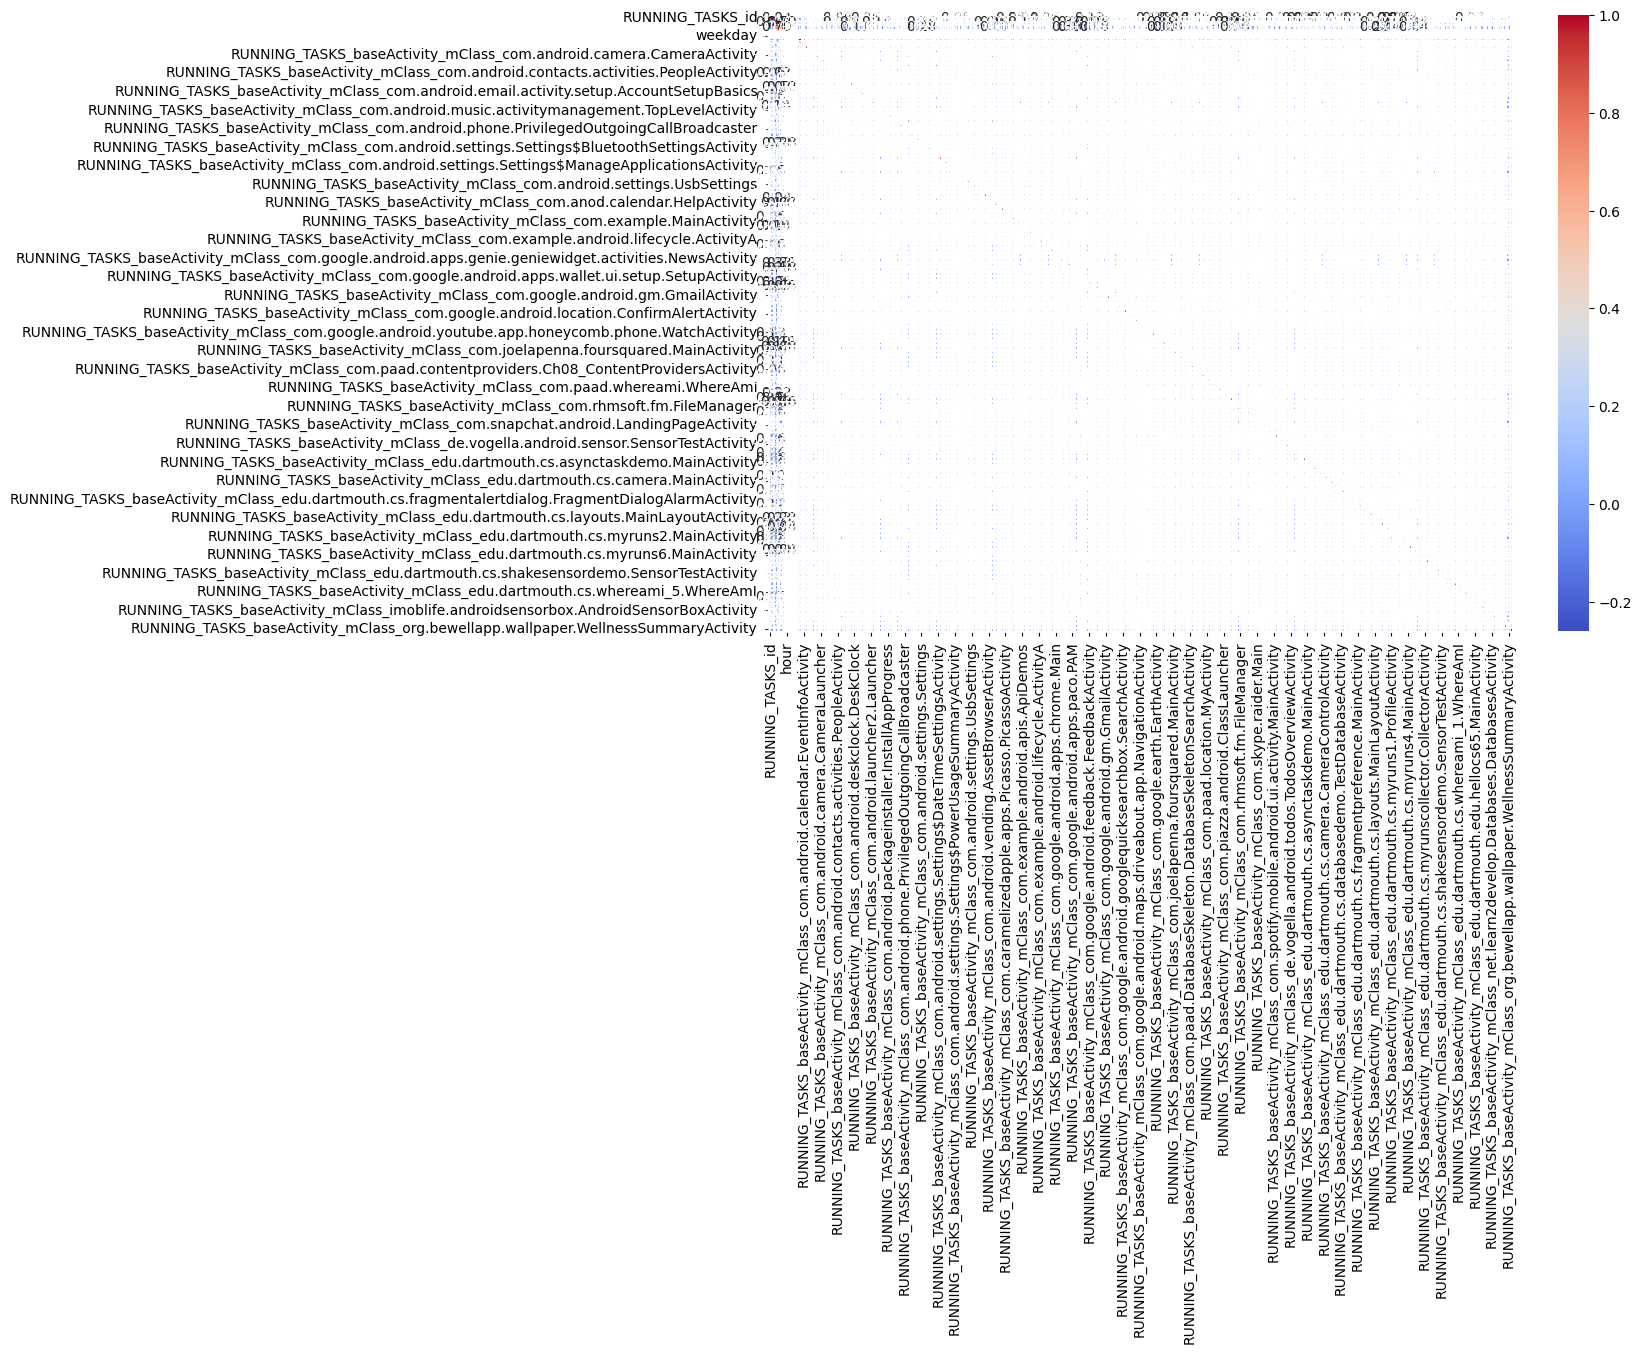

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix to find highly correlated features
corr_matrix = app_usage_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.show()

In [ ]:
# Define features (X) and target (y)
X = app_usage_df.drop(columns=['RUNNING_TASKS_numRunning'])
y = app_usage_df['RUNNING_TASKS_numRunning']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Check the unique values of your target variable
print(y_train.unique())

[ 1.36233177e+00  1.90844135e-03 -1.35851488e+00  4.08317842e+00
  2.72275509e+00  1.08852950e+01  5.44360174e+00  9.52487172e+00]


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor()

# Train the model on your training data
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Cross-validation score (R^2 is typically used for regression)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for readability
mse_scores = -cv_scores
print(f"Mean Squared Error (MSE) across folds: {mse_scores}")
print(f"Average MSE: {np.mean(mse_scores)}")

Mean Squared Error (MSE) across folds: [0.13689375 0.13402286 0.14224185 0.13328181 0.15459631]
Average MSE: 0.1402073164560394


In [ ]:
# Predict the target on the test set
y_pred = rf_model.predict(X_test)

# Calculate R^2 (Coefficient of determination) to evaluate the regression model
from sklearn.metrics import mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred)  # Mean Squared Error (MSE)
r2_test = r2_score(y_test, y_pred)  # R^2 score

print(f"Test MSE: {mse_test}")
print(f"Test R²: {r2_test}")

Test MSE: 0.13920584490384402
Test R²: 0.8372378393691298


In [ ]:
# Get feature importance from the model
feature_importances = rf_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Print the feature importances
print("Feature importances:")
for idx in sorted_idx:
    print(f"{X_train.columns[idx]}: {feature_importances[idx]}")

Feature importances:
RUNNING_TASKS_numActivities: 0.6124483383690728
RUNNING_TASKS_id: 0.14855740711656745
RUNNING_TASKS_baseActivity_mClass_com.google.android.apps.paco.PAM: 0.027514308396115735
RUNNING_TASKS_baseActivity_mClass_com.android.settings.Settings: 0.01230971537882392
RUNNING_TASKS_baseActivity_mClass_com.piazza.android.ClassLauncher: 0.011887818343747955
RUNNING_TASKS_baseActivity_mClass_com.android.vending.AssetBrowserActivity: 0.009084079237571529
RUNNING_TASKS_baseActivity_mClass_com.jawbone.up.oobe.OOBEFragmentActivity: 0.00771855254296388
RUNNING_TASKS_baseActivity_mClass_com.rhmsoft.fm.ImageGallery: 0.007639468244373741
RUNNING_TASKS_baseActivity_mClass_com.android.mms.ui.ConversationList: 0.0075704845277558995
RUNNING_TASKS_baseActivity_mClass_com.vmlite.vncserver.MainActivity: 0.007452633360483451
RUNNING_TASKS_baseActivity_mClass_com.android.settings.Settings$PowerUsageSummaryActivity: 0.007332563436508834
RUNNING_TASKS_baseActivity_mClass_com.google.android.gm.Gm

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object with the RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Best model Test MSE: {mse_best}")
print(f"Best model Test R²: {r2_best}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best model Test MSE: 0.1421533564104362
Best model Test R²: 0.833791552026607


In [ ]:
import joblib

# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
# Load the saved model from a file
loaded_model = joblib.load('random_forest_model.pkl')

# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

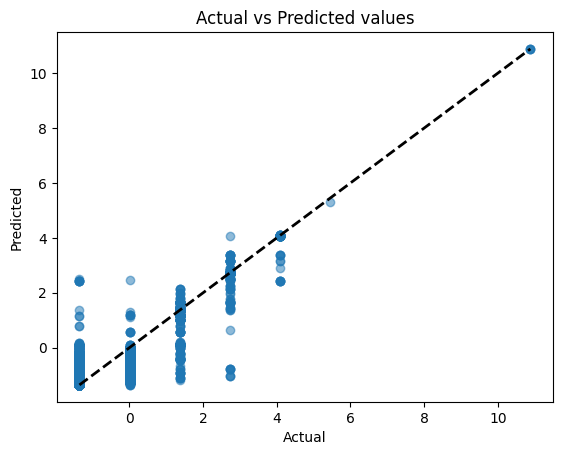

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted values')
plt.show()